# **Assignemnt- 2**

**Submitted by-**

1. **Tanishq Awasthi** - 213190003
2. **Vaibhav Singh Panwar** - 213190004 

# **Problem Statement-**

Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not. Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). Your job is to develop a pre-processing pipeline and a classifier, and also find out which subset of proteins is important in predicting which class.

**Downloading some useful libraries**

In [1]:
import numpy as np                          # Here we are importing numpy library with alias as np 
import pandas as pd                         # Here we are importing panda library with alias as pd
from matplotlib import pyplot as plt        # Here from matplotlib library we are importing pyplot with alias as plt which is used for plotting
import seaborn as sns                       # Here we are importing seaborn library with alias as sns which is used for plotting

In [2]:
from sklearn.linear_model import LogisticRegression            # Here we are importing logistic regression model from Sklearn library
from sklearn.svm import SVC                                     # Here we are importing Support Vector classification model from Sklearn library
from sklearn.ensemble import RandomForestClassifier                  # Here we are importing Random Forest Classifier model from Sklearn library
from sklearn.metrics import classification_report,confusion_matrix    # Here we are importing classification report and confusion metrics from Sklearn library

**Loading the training dataset**

In [3]:
training_dataset = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")  #downloading the training dataset provied directly from the link
training_dataset = pd.DataFrame(training_dataset) #converting the dataset into a pandas dataframe  
display(training_dataset) #displaying the training dataset

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


In our training dataset, there are 79 columns and 762 samples, including 2 columns of target data and 77 columns of our features (proteins). Here, one column (genotype) would be for binary classification and the other column (treatment_behaviour) would be for multi class classification. We also see that some of the columns have missing values, so we need to handle them also.

**Loading the testing dataset**

In [4]:
testing_dataset = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")  #downloading the testing dataset provied directly from the link
testing_dataset = pd.DataFrame(testing_dataset)     #converting the dataset into a pandas dataframe 
display(testing_dataset)                          #displaying the training dataset

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In our testing dataset, there are 79 columns and 225 samples, including 2 columns of target data and 77 columns of our features (proteins). We also see that some of the columns have missing values, so we need to handle them also.

**Finding the numbers of unique labels in each of the class and visualising them-** 

**In training dataset-**

The number of 'Control' labels in column 'Genotype' are =   435
The number of 'Ts65Dn' labels in column 'Genotype' are =   327


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


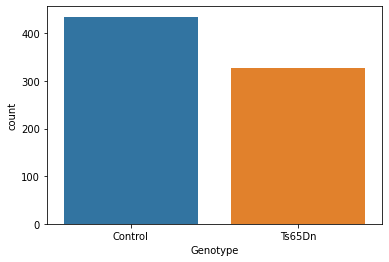

In [5]:
count = sns.countplot(training_dataset['Genotype'],label = 'Count') #here we are plotting a counter plot for number of unique labels in column "genotype" in our training dataset
C,T = training_dataset['Genotype'].value_counts()         
print("The number of 'Control' labels in column 'Genotype' are =  ", C)   
print("The number of 'Ts65Dn' labels in column 'Genotype' are =  ",T)

Here, we see that in our column for binary classifier, 435 samples are from "control" label and 327 are from "Ts65Dn" label. As, we see that we have sufficient data of both the labels and also, the number of samples are almost equal in number, so we can say that our **class is balanced**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The number of 'Memantine_C/S' labels in column 'Treatment_Behavior' are =   225
The number of 'Memantine_S/C' labels in column 'Treatment_Behavior' are =   225
The number of 'Saline_C/S' labels in column 'Treatment_Behavior' are =   180
The number of 'Saline_S/C' labels in column 'Treatment_Behavior' are =   132


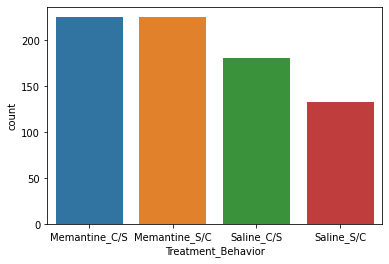

In [6]:
count = sns.countplot(training_dataset['Treatment_Behavior'],label = 'Count')   #here we are plotting a counter plot for number of unique labels in column "treatment_behaviour" in our training dataset
A,B,C,D = training_dataset['Treatment_Behavior'].value_counts()
print("The number of 'Memantine_C/S' labels in column 'Treatment_Behavior' are =  ",A)
print("The number of 'Memantine_S/C' labels in column 'Treatment_Behavior' are =  ",B)
print("The number of 'Saline_C/S' labels in column 'Treatment_Behavior' are =  ",C)
print("The number of 'Saline_S/C' labels in column 'Treatment_Behavior' are =  ",D)

Here, we see that in our column for multi class classifier, 225 samples are from "Memantine_C/S" label, 225 are from "Memantine_C/S" label,180 samples are from "Saline_C/S" label and 132 are from "Saline_S/C" label. As, we see that we have sufficient data of both the labels and also, the number of samples are almost equal in number, so we can say that our **class is balanced**

**Observation - Both of the classes in training data are balanced.**

**In testing Dataset-**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The number of 'Control' labels in column 'Genotype' are =   135
The number of 'Ts65Dn' labels in column 'Genotype' are =   90


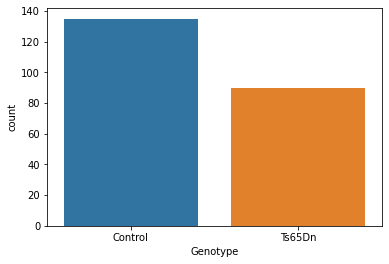

In [7]:
count = sns.countplot(testing_dataset['Genotype'],label = 'Count') #here we are plotting a counter plot for number of unique labels in column "genotype" in our testing dataset
C,T = testing_dataset['Genotype'].value_counts()
print("The number of 'Control' labels in column 'Genotype' are =  ", C)
print("The number of 'Ts65Dn' labels in column 'Genotype' are =  ",T)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The number of 'Memantine_C/S' labels in column 'Treatment_Behavior' are =   60
The number of 'Memantine_S/C' labels in column 'Treatment_Behavior' are =   60
The number of 'Saline_C/S' labels in column 'Treatment_Behavior' are =   60
The number of 'Saline_S/C' labels in column 'Treatment_Behavior' are =   45


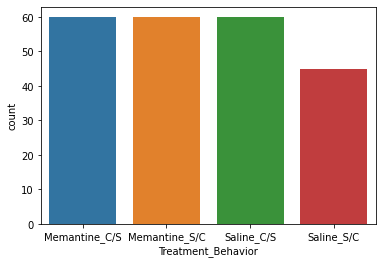

In [8]:
count = sns.countplot(testing_dataset['Treatment_Behavior'],label = 'Count') #here we are plotting a counter plot for number of unique labels in column "treatment_behaviour" in our testing dataset
A,B,C,D = testing_dataset['Treatment_Behavior'].value_counts()
print("The number of 'Memantine_C/S' labels in column 'Treatment_Behavior' are =  ",A)
print("The number of 'Memantine_S/C' labels in column 'Treatment_Behavior' are =  ",B)
print("The number of 'Saline_C/S' labels in column 'Treatment_Behavior' are =  ",C)
print("The number of 'Saline_S/C' labels in column 'Treatment_Behavior' are =  ",D)

**Observation - Both the classes are balanced in testing dataset also**

**Finding out NaN (missing) values from each column in each of the dataset-**

**In training dataset-**

Here, we first are visualising how many values are missing from each of the column from our training dataset-

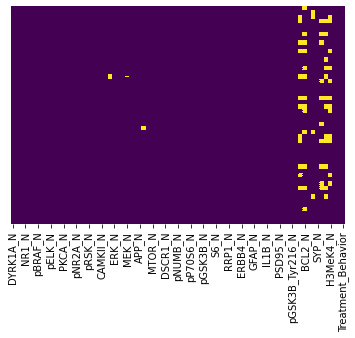

In [9]:
sns.heatmap(training_dataset.isnull(),yticklabels =False,cbar = False,cmap = 'viridis')

**Some values are missing from columns.**

In [10]:
pd.DataFrame(training_dataset.isnull().sum())

,0
DYRK1A_N,0
ITSN1_N,0
BDNF_N,0
NR1_N,0
NR2A_N,0
...,...
EGR1_N,180
H3MeK4_N,180
CaNA_N,0
Genotype,0


Highest number of values missing from our training dataset are from the columns named "EGR1_N" and "H3MeK4_N" and 180 values are missing from these two columns.

**In testing dataset-**

Here, we first are visualising how many values are missing from each of the column from our testing dataset-

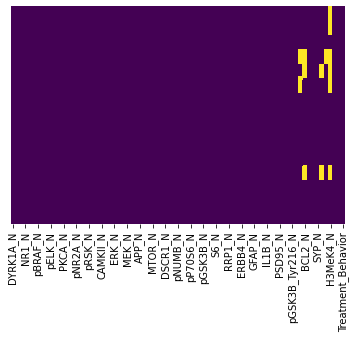

In [11]:
sns.heatmap(testing_dataset.isnull(),yticklabels =False,cbar = False,cmap = 'viridis')

**Some values are missing from our testing dataset also..**

In [12]:
pd.DataFrame(testing_dataset.isnull().sum())

,0
DYRK1A_N,0
ITSN1_N,0
BDNF_N,0
NR1_N,0
NR2A_N,0
...,...
EGR1_N,15
H3MeK4_N,90
CaNA_N,0
Genotype,0


**Here, we allocate our training and testing dataset into independent varaibles and dependent variables (target variables)-**

In [13]:
training_x = training_dataset.loc[:,'DYRK1A_N':'CaNA_N']
training_y1 = training_dataset.loc[:,'Genotype']
training_y2 = training_dataset.loc[:,'Treatment_Behavior']
testing_x = testing_dataset.loc[:,'DYRK1A_N':'CaNA_N']
testing_y1 = testing_dataset.loc[:,'Genotype']
testing_y2 = testing_dataset.loc[:,'Treatment_Behavior']


**Here, we are finding out no. of unique values in each of our target data-**

In [14]:
C= np.unique(training_y1)
print("The unique values in C (target) are = ",(C))
print("Total number of uniqie values in Target=",len(C))

The unique values in C (target) are =  ['Control' 'Ts65Dn']
Total number of uniqie values in Target= 2


In [15]:
C= np.unique(training_y2)
print("The unique values in C (target) are = ",(C))
print("Total number of uniqie values in Target=",len(C))

The unique values in C (target) are =  ['Memantine_C/S' 'Memantine_S/C' 'Saline_C/S' 'Saline_S/C']
Total number of uniqie values in Target= 4


**Filling out missing values from training dataset by using multi-variate imputatation-**

**Comment-** 

As, from our dataset, some values were missing and so, we need to handle those missing values. We cant just drop out the rows in which missing values are there beacuse, our dataset is not very large and after dropping those rows, it will shrink to a much lesser data which will not be beneficial for our machine learning models.

The next approach to handle these missing values was to fill the missing values from the mean value of the respective column, but it turns out that there is a better way to handle missing data and it is to use **Multi variate Imputer from Sklearn library**. Multivariate imputer fills the missing values of each column by using in-built Linear Regression model treating the missing values column as the target output, and this it does for each of the columns which are having missing values.

**Reference-**

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [16]:
from sklearn.experimental import enable_iterative_imputer                         #importing the iterative imputer from Sklearn
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(missing_values = np.nan)                                #initialising the imputer
imputer.fit(training_x)                                                           #fitting the imputer on training dataset
training_x = imputer.transform(training_x)                                        #getting the result after missing. values have been filled
training_x = pd.DataFrame(training_x)                                      #converting into a dataframe
imputer_testing = IterativeImputer(missing_values = np.nan)               #doing the same thing for testing data
imputer_testing.fit(testing_x)
testing_x = imputer_testing.transform(testing_x)
testing_x = pd.DataFrame(testing_x)

In [17]:
training_x.columns = training_dataset.columns[:77] #storing the columns header, this will help afterwards

**Now that our missing values have been filled, we display our data-**

In [18]:
training_x

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197436,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [19]:
testing_x.columns = training_dataset.columns[:77]     #storing the columns header, this will help afterwards

**Displaying test dataset after missing values have been filled-**

In [20]:
testing_x

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.121739,1.649983
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.116850,1.638988
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.108506,1.564925
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.144687,1.682222
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.140219,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.278251,0.208354,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.273234,0.192760,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.289738,0.218179,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.279559,0.209781,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718


**Further step-**

Now, after this, we want to remove some of the features which are having high correlation between them. Here, we are keeping the threshold value of correlationn as 0.9, i.e. columns having correlation value of 0.9 will be dropped and only one of those features will be used-

**Finding out correlation between features in the training dataset-**

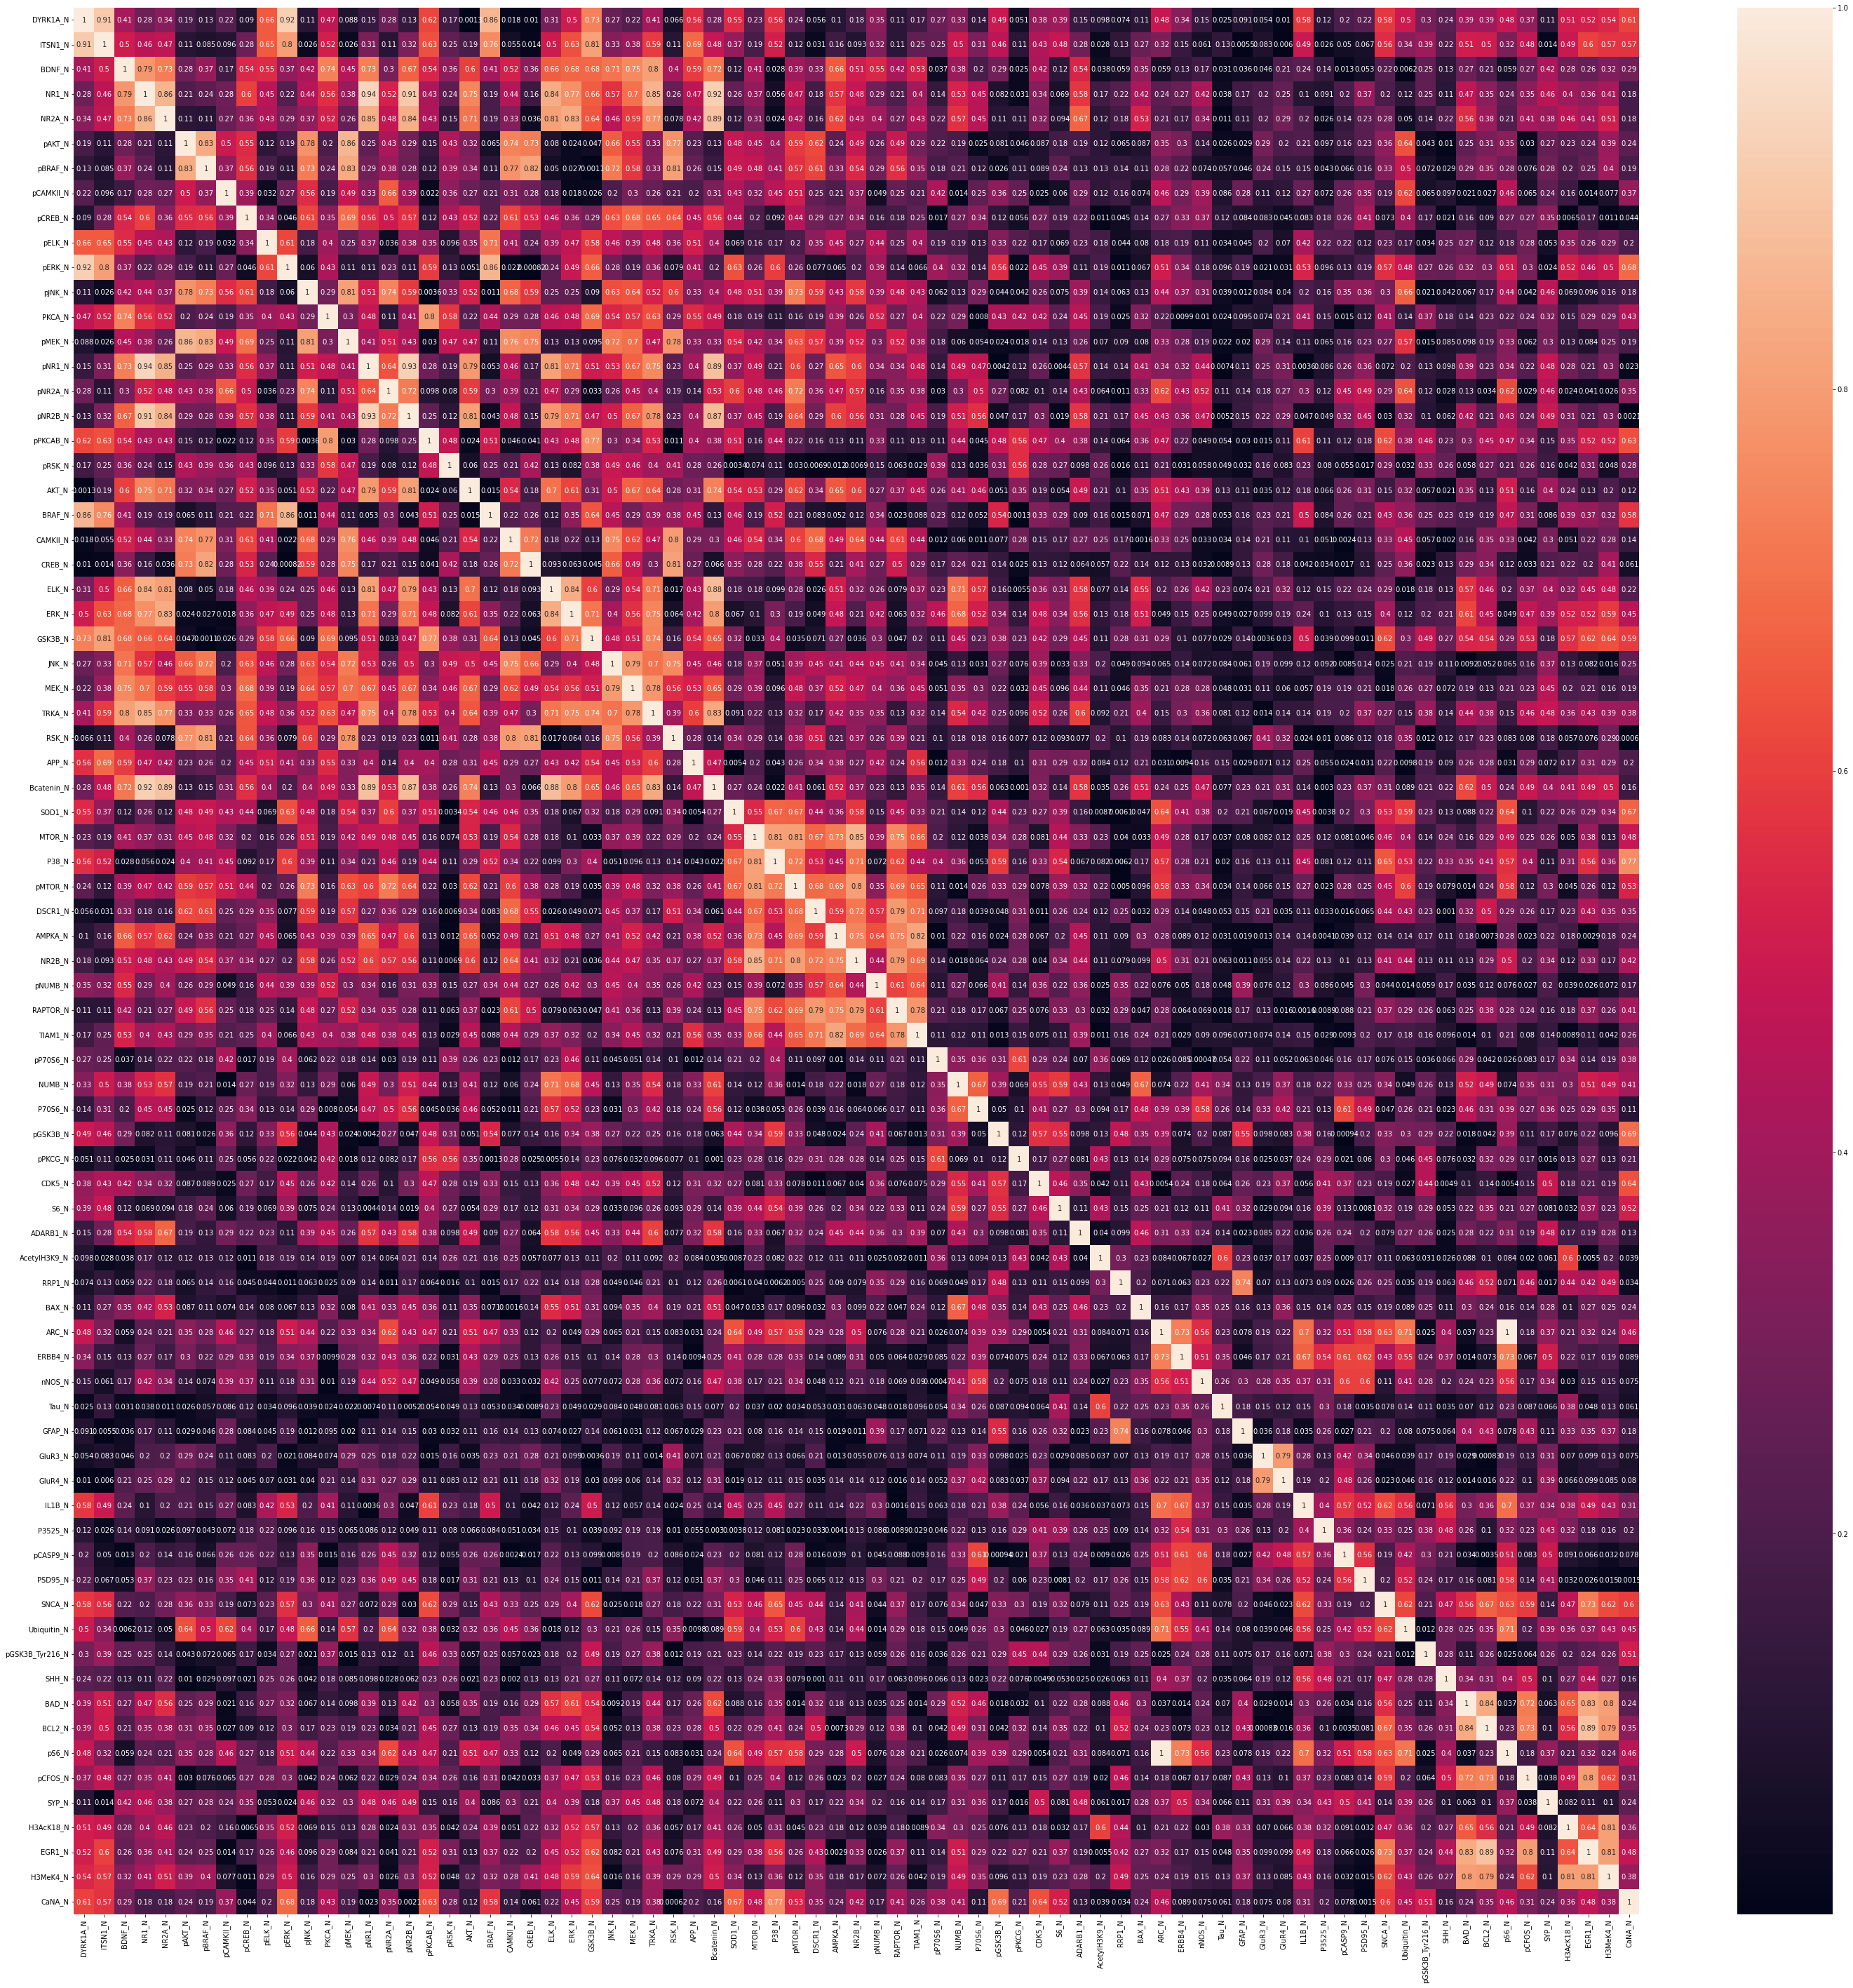

In [21]:
corr_matrix = training_x.corr(method = 'spearman') #here, we are using spearmen correlation
corr_matrix_testing = testing_x.corr(method = 'spearman')
fig,ax = plt.subplots(figsize = (50,50))
sns.heatmap(abs(corr_matrix),annot = True) #plotting the heatmap 
plt.show()

**Removing the highly corelated features from the dataset whose correlation is greater then 0.9 :**

In [22]:
def correlation(data,threshold): #defining a function that will remove the highly correlated variables
  correlated_columns =[]
  correlated_matrix = corr_matrix
  for i in range(len(correlated_matrix.columns)):
    for j in range(i):
      if (correlated_matrix.iloc[i,j]) >= threshold:
        colname = correlated_matrix.columns[i]
        correlated_columns.append(colname)
  return correlated_columns

corr_features = correlation(training_x,0.90)
print("The number of corelated features are = ",(len(corr_features)-1))
print("The index of correlated features are = ", corr_features)
training_x = training_x.drop(corr_features,axis = 1)
testing_x = testing_x.drop(corr_features,axis = 1)

The number of corelated features are =  6
The index of correlated features are =  ['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N']


**Observation-** 

**Total 6 features have been removed**. The removed features are - **'ITSN1_N', 'pERK_N', 'pNR2B_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N'**

In [23]:
headers_after_impute = training_x.columns ##storing the columns header, this will help afterwards, as after using any function from sklearn_preprocessing library, the column headers changes to index of the columns

In [24]:
headers_after_impute #these are the columns which are left after we remove some of the features

Index(['DYRK1A_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N',
       'pNR2A_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N',
       'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N',
       'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N',
       'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N',
       'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N',
       'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N',
       'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N',
       'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N',
       'SHH_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N',
       'H3MeK4_N', 'CaNA_N'],
      dtype='object')

**The above printed features will be important for training our models.**

**Further Step-** 

Now, we need to normalise the data of our training and testing dataset, as each of the feature is not in the same range. After normalising , each of the feature will be in the **range of 0 to 1**

For this, we are using MinMaxScaler module from the SKlearn library-

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_x = scaler.fit_transform(training_x) #normalising the training dataset
training_x =  pd.DataFrame(training_x)    


In [27]:
testing_x = scaler.fit_transform(testing_x)  #normalising the testing dataset
testing_x =  pd.DataFrame(testing_x)

In [29]:
training_x.columns = headers_after_impute

In [30]:
testing_x.columns = headers_after_impute

**Further Step-**

Now,we know that the models Logistic Regression, SVC, Random Forest from the Sklearn Library can handle categorical data as it is in case of Classification problem without any encoding, but we need to do encoding for our MLPClassifier. Now, MLPClassifier can too handle this data, bit it needs to be in form of some dummy variable and not in the Object Datatype.

For this reason only, **we are encoding our target variables**.

**Binary Classifier feature has been encoded to variables 0 and 1, while the Multi class Classifier feature has been encoded to the variables 0,1,2 and 3.**

We define a function that will take datasets as arguement and will return the datsets after encoding-

In [31]:
def encoder(data,data2):
  y = np.ones([data.shape[0],])
  for i in range(data.shape[0]):
    if(data[i] == "Control"):
      y[i] = 0
    else:
      y[i] = 1
  data = pd.DataFrame(y)
  y2 =  np.ones([data2.shape[0],])
  for i in range(data2.shape[0]):
    if(data2[i]=="Memantine_C/S"):
      y2[i] = 0
    elif (data2[i]=="Memantine_S/C"):
      y2[i] = 1
    elif (data2[i]=="Saline_C/S"):
      y2[i] = 2
    else:
      y2[i] = 3

  data2 = pd.DataFrame(y2)
  return data,data2

In [32]:
training_y1,training_y2 = encoder(training_y1,training_y2) #encoding the training data
testing_y1,testing_y2 = encoder(testing_y1,testing_y2)    #encoding the testing data

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #importing accuracy_score, precision_score, recall_score, f1_score to measure our model performances
from sklearn.metrics import confusion_matrix                  #importing confusion metrics 
from sklearn.neural_network import MLPClassifier      #importing MLPClassifier for classification with a nearal network
from sklearn.model_selection import GridSearchCV      #importing GridSearchCV for the hyperparamterr tuning of our models

**Applying Grid search on our models to find out best hyperparametrs for binary Classification-**

**Note-** 

Here, we are not using special K-fold validation, but instead, the **Grid search CV algorithm will take care of 5 folds cross validation** as we have passed the paramter for this. 

Now, Grid search CV will return us the best parameters for a model after training on the training data after doing 5-folds cross validation. 
**After getting the best parameters, we will train our models on those parameters.**

**We will pass model parameters as a list, and Grid Search Cv will do permutation for each and every parameter, and will return the best model parameters.**

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.56,0.58,0.6],
            'kernel': ['rbf','linear','poly','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [33,34,35,36],
            'max_depth': [70,80,90],
            'max_features': [27,28,29,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(penalty='elasticnet',solver='saga'),
        'params': {
            'C': [0.65,0.67,0.69,0.7,1],
            'l1_ratio': [0.84,0.85,0.88]
        }
    }
}

In [ ]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(training_x, training_y1)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_
    })


In [ ]:
df_best = pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
df_best

,model,best_score,best_parameters
0,svm,0.801789,"{'C': 0.56, 'kernel': 'linear'}"
1,random_forest,0.721844,"{'max_depth': 80, 'max_features': 30, 'n_estim..."
2,logistic_regression,0.830633,"{'C': 0.65, 'l1_ratio': 0.84}"


**Observations for Binary Classification-** 

Best Model Parameters- 

1. **For SVM-** 
           kernels = linear
          slack penalty = 0.56
          accuracy = 80.12 %

2. **For Random Forest-** 

                  number of trees = 33
                   max tree depth = 80
        max number of variables per node = 30
                        accuracy = 72.18 %

3. **For Logistic Regression -** 

                  ratio of l1 and l2 weight = 0.84
                  Inverse of regularization strength = 0.65
                  accuracy = 83.06 %

**Applying Grid search on our models to find out best hyperparametrs for multiclass classification-**

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.7,0.75,0.8,0.85],
            'kernel': ['rbf','linear','poly','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [32,33,34,35,36],
            'max_depth': [90,92,93,94,96,100],
            'max_features': [26,27,28,29,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(penalty='elasticnet',solver='saga'),
        'params': {
            'C': [2,2.5,3,3.5,4,4.5],
            'l1_ratio': [0.1,0.2,0.3,0.4,0.5]
        }
    }
}

In [ ]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(training_x, training_y2)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_
    })

In [ ]:
df_best = pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
df_best

,model,best_score,best_parameters
0,svm,0.729575,"{'C': 0.85, 'kernel': 'linear'}"
1,random_forest,0.677193,"{'max_depth': 96, 'max_features': 28, 'n_estim..."
2,logistic_regression,0.725628,"{'C': 4.5, 'l1_ratio': 0.2}"


**Observations for Multi Class Classification-** 

Best Model Parameters- 

1. **For SVM-** 
           kernels = linear
          slack penalty = 0.85
          accuracy = 72.95 %

2. **For Random Forest-** 

                  number of trees = 33
                   max tree depth = 96
        max number of variables per node = 28
                        accuracy = 67.72 %

3. **For Logistic Regression -** 

                  ratio of l1 and l2 weight = 0.2
                  Inverse of regularization strength = 4.5
                  accuracy = 72.56 %

**Applying Grid search on MLPClassifier (binary classification) to find best hyperparameters-**

In [ ]:
scores = []
mlp_bn = MLPClassifier(solver='adam', max_iter=500, random_state=0)
mlp_bn.out_activation = 'Softmax'
parameter_space = {'hidden_layer_sizes': [30,35,40,46,48],'alpha':[0.0001,0.0002,0.0003]}
clf = GridSearchCV(estimator = mlp_bn,param_grid=parameter_space,scoring='accuracy',n_jobs = -1,cv = 5)
clf.fit(training_x,training_y1)
print("The best parameters are = ",clf.best_params_)
scores.append({'best_score': clf.best_score_,'best_parameters': clf.best_params_})

In [ ]:
df_best = pd.DataFrame(scores,columns=['best_score','best_parameters'])
df_best

,best_score,best_parameters
0,0.772867,"{'alpha': 0.0002, 'hidden_layer_sizes': 46}"


**Observations for Binary Classification-** 

Best Model Parameters- 

1. **For MLPClassifier-** 
           
           number of neurons in hidden layer = 46
            weight decay = 0.0002
            accuracy = 77.29 %


**Applying Grid search on MLPClassifier (multi class classification) to find best hyperparameters-**

In [ ]:
scores = []
mlp_bn = MLPClassifier(solver='adam', max_iter=500, random_state=0)
mlp_bn.out_activation = 'Softmax'
parameter_space = {'hidden_layer_sizes': [50,51,52],'alpha':[0.0001,0.001,0.005,0.01]}
clf = GridSearchCV(estimator = mlp_bn,param_grid=parameter_space,scoring='accuracy',n_jobs = -1,cv = 5)
clf.fit(training_x,training_y2)
print("The best parameters are = ",clf.best_params_)
print("The best parameters are = ",clf.best_params_)
scores.append({'best_score': clf.best_score_,'best_parameters': clf.best_params_})

In [ ]:
df_best = pd.DataFrame(scores,columns=['best_score','best_parameters'])
df_best

,best_score,best_parameters
0,0.741477,"{'alpha': 0.001, 'hidden_layer_sizes': 51}"


**Observations for Multi Class Classification-** 

Best Model Parameters- 

1. **For MLPClassifier-** 
           
           number of neurons in hidden layer = 51
            weight decay = 0.001
            accuracy = 74.15 %

**Further Step-** 

Now, as we have got out best model parameters, **now we will train our classification models on these parameter**s on the  training data provided, and will test the accuracy on the testing data provided.

**Defining all the functions for Classification-**

**Defining a function for MLPClassifier for binary classification and this will return the final accuracy on the testing data-** 

In [41]:
def neural_binary_classifier(x_train_a,y1_train_a,x_test_a,y1_test_a):
  mlp_bn = MLPClassifier(hidden_layer_sizes=(46,),alpha = 0.0002)
  mlp_bn.out_activation = 'Softmax'
  mlp_bn.fit(x_train_a,y1_train_a)
  y_pred_a = mlp_bn.predict(x_test_a)
  class_report = classification_report(y1_test_a,y_pred_a)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Neural network with single ReLU hidden layer and Softmax output (binary classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  conf_metrics = confusion_matrix(y1_test_a,y_pred_a)
  print("The confusion matrix on testing data is = ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("The accuracy on testing data is = ",accuracy_score(y1_test_a,y_pred_a))
  print("______________________________________________________________________________________________________")
  return accuracy_score(y1_test_a,y_pred_a)*100

**Defining a function for MLPClassifier for multi class classification and this will return the final accuracy on the testing data-**

In [42]:
def neural_multi_class_classifier(x_train_m,y1_train_m,x_test_m,y1_test_m):
  mlp_bn = MLPClassifier(hidden_layer_sizes=(51,),alpha = 0.001)
  mlp_bn.out_activation = 'Softmax'
  mlp_bn.fit(x_train_m,y1_train_m)
  y_pred_m = mlp_bn.predict(x_test_m)
  class_report = classification_report(y1_test_m,y_pred_m)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Neural network with single ReLU hidden layer and Softmax output (multi class classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  print("The accuracy on testing data is = ",accuracy_score(y1_test_m,y_pred_m))
  conf_metrics = confusion_matrix(y1_test_m,y_pred_m)
  print("The confusion matrix on testing data is - ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("______________________________________________________________________________________________________")
  return accuracy_score(y1_test_m,y_pred_m)*100

**Defining a function for Logistic Reression for binary classification and this will return the final accuracy on the testing data-**

In [43]:
def logistic_binary_classifier(X_train,Y_train,X_test, Y_test):
  model = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio= 0.84,C = 0.65)
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  class_report = classification_report(Y_test,y_pred)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Elastic net logistic regression (binary classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  print("The accuracy on testing data is = ",accuracy_score(Y_test,y_pred))
  conf_metrics = confusion_matrix(Y_test,y_pred)
  print("The confusion matrix on testing data is - ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("______________________________________________________________________________________________________")
  return accuracy_score(Y_test,y_pred)*100

**Defining a function for Logistic Reression for multi class classification and this will return the final accuracy on the testing data-**

In [44]:
def logistic_multi_class_classifier(X_train,Y_train,X_test, Y_test):
  model = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio= 0.2,C = 4.5)
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  class_report = classification_report(Y_test,y_pred)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Elastic net logistic regression (multi class classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  print("The accuracy on testing data is = ",accuracy_score(Y_test,y_pred))
  conf_metrics = confusion_matrix(Y_test,y_pred)
  print("The confusion matrix on testing data is - ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("______________________________________________________________________________________________________")
  return accuracy_score(Y_test,y_pred)*100

**Defining a function for SVM classification for binary classification and this will return the final accuracy on the testing data-**

In [45]:
def SVM_binary_classifier(X_train,Y_train,X_test, Y_test):
  model = SVC(C=0.56, kernel='linear')
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  class_report = classification_report(Y_test,y_pred)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Support Vector Machine (binary classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  print("The accuracy on testing data is = ",accuracy_score(Y_test,y_pred))
  conf_metrics = confusion_matrix(Y_test,y_pred)
  print("The confusion matrix on testing data is - ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("______________________________________________________________________________________________________")
  return accuracy_score(Y_test,y_pred)*100

**Defining a function for SVM classification for multi class classification and this will return the final accuracy on the testing data-**

In [46]:
def SVM_multi_class_classifier(X_train,Y_train,X_test, Y_test):
  model = SVC(C=0.85, kernel='linear')
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  class_report = classification_report(Y_test,y_pred)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Support Vector Machine (multi class classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  print("The accuracy on testing data is = ",accuracy_score(Y_test,y_pred))
  conf_metrics = confusion_matrix(Y_test,y_pred)
  print("The confusion matrix on testing data is - ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("______________________________________________________________________________________________________")
  return accuracy_score(Y_test,y_pred)*100

**Defining a function for Random Forest Classifier for binary classification and this will return the final accuracy on the testing data-**

In [47]:
def RF_binary_classifier(X_train,Y_train,X_test, Y_test):
  model = RandomForestClassifier(n_estimators=33, max_depth=80,max_features=30) 
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  class_report = classification_report(Y_test,y_pred)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Random Forest (binary classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  print("The accuracy on testing data is = ",accuracy_score(Y_test,y_pred))
  conf_metrics = confusion_matrix(Y_test,y_pred)
  print("The confusion matrix on testing data is - ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("______________________________________________________________________________________________________")
  return accuracy_score(Y_test,y_pred)*100

**Defining a function for Random Forest Classifier for multi class classification and this will return the final accuracy on the testing data-**

In [48]:
def RF_multi_class_classifier(X_train,Y_train,X_test, Y_test):
  model = RandomForestClassifier(n_estimators=33, max_depth=96,max_features=28) 
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  class_report = classification_report(Y_test,y_pred)
  print("\n\n______________________________________________________________________________________________________")
  print("Peformance reports for Random Forest (multi class classification) are - \n ")
  print("Classification report is =\n\n ",class_report)
  print("The accuracy on testing data is = ",accuracy_score(Y_test,y_pred))
  conf_metrics = confusion_matrix(Y_test,y_pred)
  print("The confusion matrix on testing data is - ")
  sns.heatmap(conf_metrics,annot = True)
  plt.show()
  print("______________________________________________________________________________________________________")
  return accuracy_score(Y_test,y_pred)*100

In [49]:
def all_binary_classifiers(X_train,Y_train,X_test, Y_test):
  accuracy_logistic_bn = logistic_binary_classifier(X_train,Y_train,X_test, Y_test)
  accuracy_neural_bn = neural_binary_classifier(X_train,Y_train,X_test, Y_test)
  accuracy_SVM_bn = SVM_binary_classifier(X_train,Y_train,X_test, Y_test)
  accuracy_RF_bn = RF_binary_classifier(X_train,Y_train,X_test, Y_test)
  return accuracy_logistic_bn,accuracy_neural_bn,accuracy_SVM_bn,accuracy_RF_bn

In [50]:
def all_multi_class_classifiers(X_train_M,Y_train_M,X_test_M, Y_test_M):
  accuracy_logistic_mc = logistic_multi_class_classifier(X_train_M,Y_train_M,X_test_M, Y_test_M)
  accuracy_neural_mc = neural_multi_class_classifier(X_train_M,Y_train_M,X_test_M, Y_test_M)
  accuracy_SVM_mc = SVM_multi_class_classifier(X_train_M,Y_train_M,X_test_M, Y_test_M)
  accuracy_RF_mc = RF_multi_class_classifier(X_train_M,Y_train_M,X_test_M, Y_test_M)
  return accuracy_logistic_mc,accuracy_neural_mc,accuracy_SVM_mc,accuracy_RF_mc

**Here, we finally do our Binary Classification on each and every model with the best parameters that we got from GridSearchCV, train these models on training data provided and we finally get the results on the provided testing data as accuracy, confusion metrics and classification report of each and every model-**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,




______________________________________________________________________________________________________
Peformance reports for Elastic net logistic regression (binary classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       0.87      0.74      0.80       135
         1.0       0.68      0.83      0.75        90

    accuracy                           0.78       225
   macro avg       0.78      0.79      0.77       225
weighted avg       0.79      0.78      0.78       225

The accuracy on testing data is =  0.7777777777777778
The confusion matrix on testing data is - 


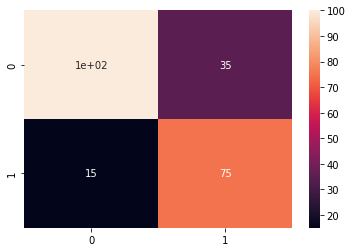

______________________________________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,




______________________________________________________________________________________________________
Peformance reports for Neural network with single ReLU hidden layer and Softmax output (binary classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       135
         1.0       0.72      0.74      0.73        90

    accuracy                           0.78       225
   macro avg       0.77      0.78      0.77       225
weighted avg       0.78      0.78      0.78       225

The confusion matrix on testing data is = 


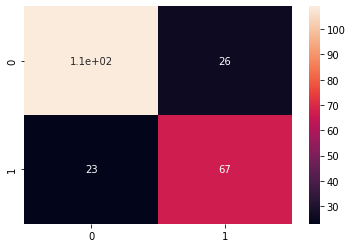

The accuracy on testing data is =  0.7822222222222223
______________________________________________________________________________________________________


______________________________________________________________________________________________________
Peformance reports for Support Vector Machine (binary classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       0.90      0.75      0.82       135
         1.0       0.70      0.88      0.78        90

    accuracy                           0.80       225
   macro avg       0.80      0.81      0.80       225
weighted avg       0.82      0.80      0.80       225

The accuracy on testing data is =  0.8
The confusion matrix on testing data is - 


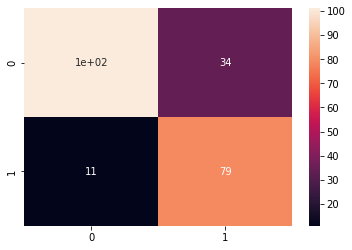

______________________________________________________________________________________________________


______________________________________________________________________________________________________
Peformance reports for Random Forest (binary classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       0.91      0.70      0.79       135
         1.0       0.67      0.90      0.77        90

    accuracy                           0.78       225
   macro avg       0.79      0.80      0.78       225
weighted avg       0.82      0.78      0.78       225

The accuracy on testing data is =  0.7822222222222223
The confusion matrix on testing data is - 


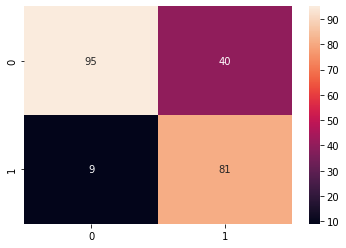

______________________________________________________________________________________________________


In [51]:

accuracy_logistic_binary,accuracy_neural_binary,accuracy_SVM_binary,accuracy_RF_binary = all_binary_classifiers(training_x,training_y1.values.ravel(),testing_x, testing_y1.values.ravel())


**Printing the final accuracy on testing data, after training with best hyperparameters in binary classification-**

In [53]:
print("The final accuracy for Logistic regression Classifier is =  ", (accuracy_logistic_binary))
print("The final accuracy for MLPClassifier (neural) is =  ", (accuracy_neural_binary))
print("The final accuracy for SVM Classifier is =  ", (accuracy_SVM_binary))
print("The final accuracy for Random Forest Classifier is =  ", (accuracy_RF_binary))

The final accuracy for Logistic regression Classifier is =   77.77777777777779
The final accuracy for MLPClassifier (neural) is =   78.22222222222223
The final accuracy for SVM Classifier is =   80.0
The final accuracy for Random Forest Classifier is =   78.22222222222223


**Observations-** 

On the testing data provided to us, we see that the accuracy which we are getting is in the **broader range of 76-82%** for each model in Binary classification.

**Here, we finally do our Multi Class Classification on each and every model with the best parameters that we got from GridSearchCV, train these models on training data provided and we finally get the results on the provided testing data as accuracy, confusion metrics and classification report of each and every model-**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,




______________________________________________________________________________________________________
Peformance reports for Elastic net logistic regression (multi class classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        60
         1.0       0.88      0.97      0.92        60
         2.0       0.73      0.98      0.84        60
         3.0       0.95      0.84      0.89        45

    accuracy                           0.86       225
   macro avg       0.89      0.86      0.86       225
weighted avg       0.89      0.86      0.85       225

The accuracy on testing data is =  0.8577777777777778
The confusion matrix on testing data is - 


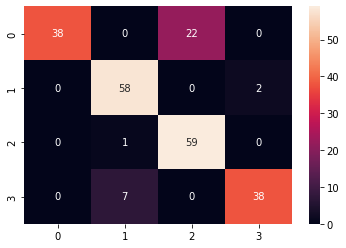

______________________________________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,




______________________________________________________________________________________________________
Peformance reports for Neural network with single ReLU hidden layer and Softmax output (multi class classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       1.00      0.37      0.54        60
         1.0       0.84      0.90      0.87        60
         2.0       0.61      1.00      0.76        60
         3.0       0.85      0.78      0.81        45

    accuracy                           0.76       225
   macro avg       0.83      0.76      0.75       225
weighted avg       0.83      0.76      0.74       225

The accuracy on testing data is =  0.76
The confusion matrix on testing data is - 


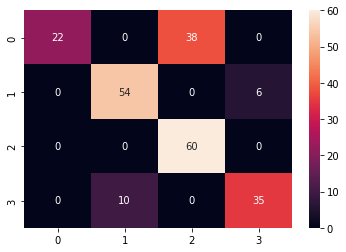

______________________________________________________________________________________________________


______________________________________________________________________________________________________
Peformance reports for Support Vector Machine (multi class classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       1.00      0.37      0.54        60
         1.0       0.97      0.93      0.95        60
         2.0       0.61      1.00      0.76        60
         3.0       0.91      0.96      0.93        45

    accuracy                           0.80       225
   macro avg       0.87      0.81      0.80       225
weighted avg       0.87      0.80      0.79       225

The accuracy on testing data is =  0.8044444444444444
The confusion matrix on testing data is - 


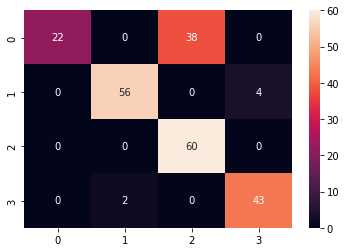

______________________________________________________________________________________________________


______________________________________________________________________________________________________
Peformance reports for Random Forest (multi class classification) are - 
 
Classification report is =

                precision    recall  f1-score   support

         0.0       0.59      0.38      0.46        60
         1.0       0.53      0.27      0.36        60
         2.0       0.54      0.73      0.62        60
         3.0       0.42      0.69      0.52        45

    accuracy                           0.51       225
   macro avg       0.52      0.52      0.49       225
weighted avg       0.53      0.51      0.49       225

The accuracy on testing data is =  0.5066666666666667
The confusion matrix on testing data is - 


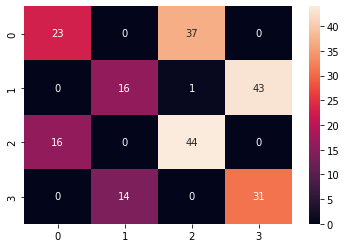

______________________________________________________________________________________________________


In [54]:

accuracy_logistic_multi_class,accuracy_neural_multi_class,accuracy_SVM_multi_class,accuracy_RF_multi_class = all_multi_class_classifiers(training_x,training_y2.values.ravel(),testing_x,testing_y2.values.ravel())


**Printing the final accuracy on testing data, after training with best hyperparameters-**

In [55]:
print("The final accuracy for Logistic regression Classifier is =  ", (accuracy_logistic_multi_class))
print("The final accuracy for MLPClassifier (neural) is =  ", (accuracy_neural_multi_class))
print("The final accuracy for SVM Classifier is =  ", (accuracy_SVM_multi_class))
print("The final accuracy for Random Forest Classifier is =  ", (accuracy_RF_multi_class))

The final accuracy for Logistic regression Classifier is =   85.77777777777777
The final accuracy for MLPClassifier (neural) is =   76.0
The final accuracy for SVM Classifier is =   80.44444444444444
The final accuracy for Random Forest Classifier is =   50.66666666666667


**Observations-** 

On the testing data provided to us, we see that the accuracy which we are getting for multi class classification is best for Logistic regression Classifier which is  = 85.77 %, and the least accuracy we are getting is on Random Forest Classifier which is around 50 % . We also see that the accuracy for multi class classification is less for Random Forest Classifieer while it comes out greater for Logistic regression classifier and remains the same for other two models.

# Checking feature importance for each model to see if the same proteins are important for each model.

Here, we import recursive feature elimination from Sklearn library to test which features (proteins) are most important for each and every model.

Recursive feature elimination is basically a backward selection of the predictors. This technique begins by building a model on the entire set of predictors and computing an importance score for each predictor. The least important predictor(s) are then removed, the model is re-built, and importance scores are computed again. In practice, the analyst specifies the number of predictor subsets to evaluate as well as each subset’s size. Therefore, the subset size is a tuning parameter for RFE. The subset size that optimizes the performance criteria is used to select the predictors based on the importance rankings. The optimal subset is then used to train the final model.

**Reference for this understanding-** 

https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

In [56]:
from sklearn.feature_selection import RFECV

**Finding out the feature importance for each model to see if the same proteins are important for each model.**

In [57]:
Lr_fe_binary = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio= 0.84,C = 0.65,tol=0.01,random_state=100)
svc_fe_binary = SVC(C=0.56, kernel='linear',random_state=100)
rf_fe_binary = RandomForestClassifier(n_estimators=33, max_depth=80,max_features=0.43,random_state=100)

**Finding out most important feature for Logistic Regression in Binary Classification-**

In [58]:
rfecv = RFECV(estimator = Lr_fe_binary,cv = 5)
fit = rfecv.fit(training_x,training_y1.values.ravel())
score_pred = rfecv.score(training_x,training_y1)
print("Feature Ranking: %s" % fit.ranking_)
print("Num Features: %d" % fit.n_features_)
selected_rfe_features = pd.DataFrame({'Feature':list(training_x.columns),
                                      'Ranking':rfecv.ranking_})
print(selected_rfe_features.sort_values(by='Ranking'))
print("------------------------------------------------")
print("SCORE FOR TRAINING DATA:",score_pred)
print("------------------------------------------------")
#return score_pred,selected_rfe_features.sort_values(by='Ranking')

Feature Ranking: [46  1  1  1  3 16  1 15 14 21 27 23  5 19 28 20 13 29 11  1  1 34 36 18
  1 42  1 25  1 37 10  1  1  1  1 45  1 17  1  1 22  1  4  1 26  2 33  9
 12  1  1  1 38  1 24 31 32  1  1 40  1 41 43 39 30  7  1  6 35  8 44]
Num Features: 26
     Feature  Ranking
34   pNUMB_N        1
24    TRKA_N        1
26     APP_N        1
28    MTOR_N        1
57  pCASP9_N        1
..       ...      ...
25     RSK_N       42
62     SHH_N       43
70    CaNA_N       44
35  RAPTOR_N       45
0   DYRK1A_N       46

[71 rows x 2 columns]
------------------------------------------------
SCORE FOR TRAINING DATA: 0.9501312335958005
------------------------------------------------


**Observation-** 

Only **26 features** are important for Logistic Regression in Binary Classification.

**Comment- The  features with ranking 1 are the most important features.**

**Further step-**

**Now, we will further test our model on the testing data, after removing the features which are not important.** 

In [59]:
pred = rfecv.predict(testing_x)
score_pred = rfecv.score(testing_x,testing_y1)

In [60]:
print("SCORE FOR TESTING DATA:",score_pred)

SCORE FOR TESTING DATA: 0.8088888888888889


**Finding out most important feature for SVC Regression in Binary Classification**

In [61]:
rfecv = RFECV(estimator = svc_fe_binary,cv = 5)
fit = rfecv.fit(training_x,training_y1.values.ravel())
score_pred = rfecv.score(training_x,training_y1)
print("Feature Ranking: %s" % fit.ranking_)
print("Num Features: %d" % fit.n_features_)
selected_rfe_features = pd.DataFrame({'Feature':list(training_x.columns),
                                      'Ranking':rfecv.ranking_})
print(selected_rfe_features.sort_values(by='Ranking'))
print("------------------------------------------------")
print("SCORE FOR TRAINING DATA:",score_pred)
print("------------------------------------------------")

Feature Ranking: [13  1  1 21  5 19  1 18 38 31 29 45  7 15  6 27 41 25 37  1  1 44 49 40
  1  8  1 17  1  9 20  1  1  1  1 30  1 11  1  1 43  1 42 48  4 16 47 22
 28  1 12  1 39  1 23  3 34  1  2 36  1 14 35 26 46 50  1 33 24 10 32]
Num Features: 22
     Feature  Ranking
24    TRKA_N        1
20     ERK_N        1
57  pCASP9_N        1
26     APP_N        1
28    MTOR_N        1
..       ...      ...
64    BCL2_N       46
46    RRP1_N       47
43      S6_N       48
22     JNK_N       49
65   pCFOS_N       50

[71 rows x 2 columns]
------------------------------------------------
SCORE FOR TRAINING DATA: 0.9593175853018373
------------------------------------------------


**Only 22 features are important for SVC Regression in Binary Classification**

**Further step-**

**Now, we will further test our model on the testing data, after removing the features which are not important.**

In [62]:
pred = rfecv.predict(testing_x)
score_pred = rfecv.score(testing_x,testing_y1)

In [64]:
print("SCORE FOR TESTING DATA:",score_pred)

SCORE FOR TESTING DATA: 0.8044444444444444


**Finding out most important feature for RF Classification in Binary Classification**

In [65]:
rfecv = RFECV(estimator = rf_fe_binary,cv = 5)
fit = rfecv.fit(training_x,training_y1.values.ravel())
score_pred = rfecv.score(training_x,training_y1)
print("Feature Ranking: %s" % fit.ranking_)
print("Num Features: %d" % fit.n_features_)
selected_rfe_features = pd.DataFrame({'Feature':list(training_x.columns),
                                      'Ranking':rfecv.ranking_})
print(selected_rfe_features.sort_values(by='Ranking'))
print("------------------------------------------------")
print("SCORE FOR TRAINING DATA:",score_pred)
print("------------------------------------------------")

Feature Ranking: [ 1 14  1  5  1 50 28 49 11 40 36 47 18  2 20 44  1 15 25  9 19 26 41 48
 13 38  1  7  1  1  1  1  1  1  1 33 12 31 23 45  4  1 43  1  1  1 32 34
 10 29 27  1  1  1 24 37 30  3  6 42  1 21 39 46  8 22 16 17 51 35  1]
Num Features: 21
     Feature  Ranking
0   DYRK1A_N        1
29     P38_N        1
30   pMTOR_N        1
31   DSCR1_N        1
32   AMPKA_N        1
..       ...      ...
11    pMEK_N       47
23     MEK_N       48
7    pCREB_N       49
5    pBRAF_N       50
68    EGR1_N       51

[71 rows x 2 columns]
------------------------------------------------
SCORE FOR TRAINING DATA: 1.0
------------------------------------------------


**Only 21 features are important for RF Classifier in Binary Classification**

**Further step-**

**Now, we will further test our model on the testing data, after removing the features which are not important.**

In [66]:
pred = rfecv.predict(testing_x)
score_pred = rfecv.score(testing_x,testing_y1)

In [67]:
print("SCORE FOR TESTING DATA:",score_pred)

SCORE FOR TESTING DATA: 0.7555555555555555


#for Multiclass

In [68]:
Lr_fe_multi = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio= 0.2,C = 4.5,tol = 0.01,random_state=100)
svc_fe_multi = SVC(C=0.85, kernel='linear',random_state=100)
rf_fe_multi = RandomForestClassifier(n_estimators=33, max_depth=96,max_features=0.40,random_state=100)

**Finding out most important feature for Logistic Classification in multi class Classification-**

In [69]:
rfecv = RFECV(estimator = Lr_fe_multi,cv = 5)
fit = rfecv.fit(training_x,training_y2.values.ravel())
score_pred = rfecv.score(training_x,training_y2)
print("Feature Ranking: %s" % fit.ranking_)
print("Num Features: %d" % fit.n_features_)
selected_rfe_features = pd.DataFrame({'Feature':list(training_x.columns),
                                      'Ranking':rfecv.ranking_})
print(selected_rfe_features.sort_values(by='Ranking'))
print("------------------------------------------------")
print("SCORE FOR TRAINING DATA:",score_pred)
print("------------------------------------------------")

Feature Ranking: [ 1  1 14  1  9  1  1  1  6  1  1 15  1  1  3  1  1  1  7  1  1  1  1  1
  1  1  1  1  1  1  1  1 20  1  1  2  1  1  1  1  1  1  1  1 17 16 19  1
  1  4  1  1  1  1 12  1  1  1 13  1  1  1  8 10  5  1  1  1 18 11  1]
Num Features: 52
         Feature  Ranking
0       DYRK1A_N        1
31       DSCR1_N        1
33        NR2B_N        1
34       pNUMB_N        1
36       TIAM1_N        1
..           ...      ...
45  AcetylH3K9_N       16
44      ADARB1_N       17
68        EGR1_N       18
46        RRP1_N       19
32       AMPKA_N       20

[71 rows x 2 columns]
------------------------------------------------
SCORE FOR TRAINING DATA: 0.9868766404199475
------------------------------------------------


**Only 52 features are important for Logistic Regression Classifier in multi class Classification**

**Further step-**

**Now, we will further test our model on the testing data, after removing the features which are not important.**

In [70]:
pred = rfecv.predict(testing_x)
score_pred = rfecv.score(testing_x,testing_y2)

In [71]:
print("SCORE FOR TESTING DATA:",score_pred)

SCORE FOR TESTING DATA: 0.8577777777777778


**Finding out most important feature for SVC Classification in multi class Classification-**

In [72]:
rfecv = RFECV(estimator = svc_fe_multi,cv = 5)
fit = rfecv.fit(training_x,training_y2.values.ravel())
score_pred = rfecv.score(training_x,training_y2)
print("Feature Ranking: %s" % fit.ranking_)
print("Num Features: %d" % fit.n_features_)
selected_rfe_features = pd.DataFrame({'Feature':list(training_x.columns),
                                      'Ranking':rfecv.ranking_})
print(selected_rfe_features.sort_values(by='Ranking'))
print("------------------------------------------------")
print("SCORE FOR TRAINING DATA:",score_pred)
print("------------------------------------------------")

Feature Ranking: [11  1 17  1  9 13  1  1 29  1  8 31 16  1 35  1  1  1 21  1  1  3  5 10
  1 18  1  1  1  1  1  1 38 20  1  6  1 28  1  1 19  2  1  1 14 27 37  1
 15 22  1  1  1  1 30  1  1  4 23  7  1  1 12 26 24 32 33 34 36 25  1]
Num Features: 34
      Feature  Ranking
70     CaNA_N        1
19      ELK_N        1
20      ERK_N        1
47      BAX_N        1
24     TRKA_N        1
..        ...      ...
67  H3AcK18_N       34
14     pRSK_N       35
68     EGR1_N       36
46     RRP1_N       37
32    AMPKA_N       38

[71 rows x 2 columns]
------------------------------------------------
SCORE FOR TRAINING DATA: 0.9829396325459318
------------------------------------------------


**Only 34 features are important for SVC Classifier in multi class Classification**

**Further step-**

**Now, we will further test our model on the testing data, after removing the features which are not important.**

In [73]:
pred = rfecv.predict(testing_x)
score_pred = rfecv.score(testing_x,testing_y2)

In [74]:
print("SCORE FOR TESTING DATA:",score_pred)

SCORE FOR TESTING DATA: 0.7644444444444445


**Finding out most important feature for RF Classification in multi class Classification-**

In [75]:
rfecv = RFECV(estimator = rf_fe_multi,cv = 5)
fit = rfecv.fit(training_x,training_y2.values.ravel())
score_pred = rfecv.score(training_x,training_y2)
print("Feature Ranking: %s" % fit.ranking_)
print("Num Features: %d" % fit.n_features_)
selected_rfe_features = pd.DataFrame({'Feature':list(training_x.columns),
                                      'Ranking':rfecv.ranking_})
print(selected_rfe_features.sort_values(by='Ranking'))
print("------------------------------------------------")
print("SCORE FOR TRAINING DATA:",score_pred)
print("------------------------------------------------")

Feature Ranking: [ 1 33 19 21  1 30  1 20  4  1 10 15 25  1  2  9  1 24 37  1 17 27  6 35
 36 28 18  1  5  1  1  1 22  8  1 16 11  1  1  1  1  1  1  1  1  1  1  1
 14 26  1  1 23  1 29  1  3  1  1  1  1  1 13 31  7 12  1  1 34 32  1]
Num Features: 35
     Feature  Ranking
0   DYRK1A_N        1
31   DSCR1_N        1
34   pNUMB_N        1
37  pP70S6_N        1
38    NUMB_N        1
..       ...      ...
1     BDNF_N       33
68    EGR1_N       34
23     MEK_N       35
24    TRKA_N       36
18    CREB_N       37

[71 rows x 2 columns]
------------------------------------------------
SCORE FOR TRAINING DATA: 1.0
------------------------------------------------


**Only 35 features are important for RF Classifier in multi class Classification**

**Further step-**

**Now, we will further test our model on the testing data, after removing the features which are not important.**

In [76]:
pred = rfecv.predict(testing_x)
score_pred = rfecv.score(testing_x,testing_y2)

In [77]:
print("SCORE FOR TESTING DATA:",score_pred)

SCORE FOR TESTING DATA: 0.5911111111111111


**Refernces-** 

1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

5. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

6. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html